# Classifier 

### Data description:

Multiple, labelled samples of pen tip trajectories recorded whilst writing individual characters. All samples are from the same writer, for the purposes of primitive extraction. Only characters with a single pen-down segment were considered.

Each character sample is a 3-dimensional pen tip velocity trajectory. This is contained in matrix format, with 3 rows and T columns where T is the length of the character sample.

The characters here were used for a PhD study on primitive extraction using HMM based models. The data consists of 2858 character samples, contained in the cell array 'mixout'. The struct variable 'consts' contains a field consts.charlabels which provides ennummerated labels for the characters. consts.key provides the key for each label. The data was captured using a WACOM tablet. 3 Dimensions were kept - x, y, and pen tip force. The data has been numerically differentiated and Gaussian smoothed, with a sigma value of 2. Data was captured at 200Hz. The data was normalised with consts.datanorm. Only characters with a single 'PEN-DOWN' segment were considered. Character segmentation was performed using a pen tip force cut-off point. The characters have also been shifted so that their velocity profiles best match the mean of the set.

## Download database

Run the cell below to collect the archives in your folder.

Safe cell that will create a folder `../trajectory_dataset` (), download and overwrite the files in this folder.

In [1]:
import os 
import requests

if not os.path.exists("../trajectory_dataset"):
    os.mkdir("../trajectory_dataset")
    r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat")
    open('../trajectory_dataset/mixoutALL_shifted.mat', 'wb').write(r.content)
    r = requests.get(" https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/trajectories.names")

    open('../trajectory_dataset/trajectories.names', 'wb').write(r.content)
# ! wget -O ../trajectory_dataset/mixoutALL_shifted.mat https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat
# ! wget -O ../trajectory_dataset/trajectories.names https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/trajectories.names

## Interacting with data

In [2]:
from scipy.io import loadmat
import numpy as np

# load data in a python dictionnary
mat = loadmat('../trajectory_dataset/mixoutALL_shifted.mat')

mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'consts', 'mixout'])

In [3]:
# Information about the dataset

n_samples = mat["mixout"][0].__len__()

print(f"Number of samples:\t {n_samples}")


# Loading samples labels
keys = mat["consts"][0,0][4]
keys = [key - 1 for key in keys[0]]

labels = mat["consts"][0,0][3]
labels = np.array([label[0] for label in labels[0]])

samples_label = labels[[keys]]

label_unique, label_count = np.unique(samples_label, return_counts=True)

print()
print("Data distribution:")
print(f"{len(label_unique)} different class")
line_u = "_______" + str.join("_", ["___" for _ in label_count]) + "_"
print(line_u)
char = "|CHAR  | " + str.join(" | ", label_unique) + " |"
print(char)
line_d = "|______|" + str.join("|", ["___" for _ in label_count]) + "|"
print(line_d)
count = "|COUNT |" + str.join("|", [str(c) for c in label_count]) + "|"
print(count)
print(line_d)


samples = mat["mixout"][0]

f_s = 200 #Hz sampling at 200Hz

print(f"\n\nN_features: \t\t{samples[0].shape[0]} ---> \t(v_x, v_y, pen_tip_force)")
print(f"Sampling frequency: \t{f_s} Hz")


Number of samples:	 2858

Data distribution:
20 different class
_______________________________________________________________________________________
|CHAR  | a | b | c | d | e | g | h | l | m | n | o | p | q | r | s | u | v | w | y | z |
|______|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|
|COUNT |171|141|142|157|186|138|127|174|125|130|141|131|124|119|133|131|155|125|137|171|
|______|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|


N_features: 		3 ---> 	(v_x, v_y, pen_tip_force)
Sampling frequency: 	200 Hz


<ipython-input-3-d784a7ea64b0>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  samples_label = labels[[keys]]


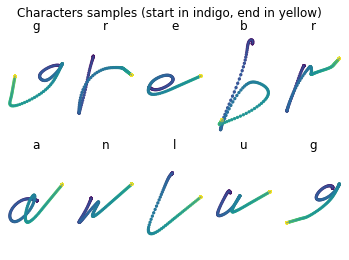

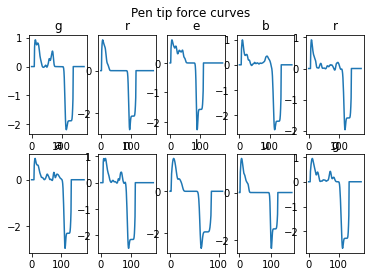

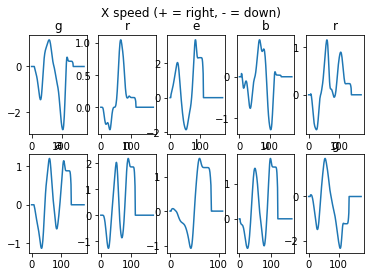

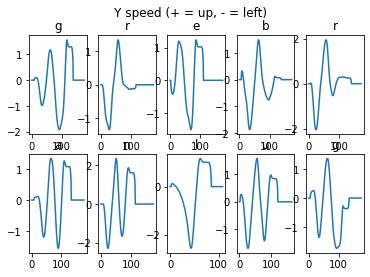

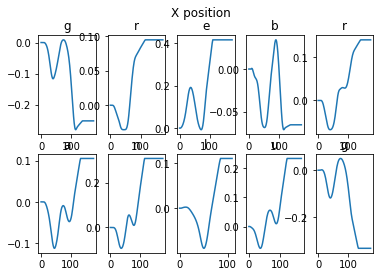

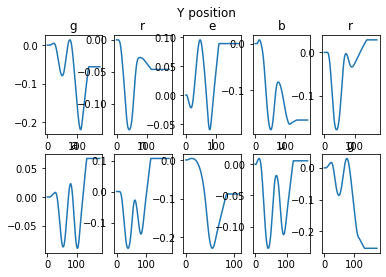

In [4]:
import matplotlib.pyplot as plt

rdm_sample_idx = np.random.randint(0, len(samples), 10)

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.scatter(x[:], y[:], c=np.arange(len(x)), s=5)

    # To modulate the linewidth depending on the pen tip force 
    # plt.scatter(x[1:], y[1:], c=np.arange(len(x[1:])), s=2*np.abs(pen_tip_f))
    
    plt.plot(x, y, alpha=0.5)
    
    plt.title(samples_label[i_sample])

    plt.axis('equal')
    plt.axis('off')
    #plt.colorbar()

plt.suptitle("Characters samples (start in indigo, end in yellow)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    pen_tip_f = exsample[2]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(pen_tip_f)), pen_tip_f)
    plt.title(samples_label[i_sample])

plt.suptitle("Pen tip force curves")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(x_speed)), x_speed)
    plt.title(samples_label[i_sample])

plt.suptitle("X speed (+ = right, - = down)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    y_speed = exsample[1]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(y_speed)), y_speed)
    plt.title(samples_label[i_sample])

plt.suptitle("Y speed (+ = up, - = left)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(x)), x)
    plt.title(samples_label[i_sample])

plt.suptitle("X position")
plt.show()


for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(y)), y)
    plt.title(samples_label[i_sample])

plt.suptitle("Y position")
plt.show()

In [5]:
x_speeds = []
y_speeds = []
pen_tip_forces = []
max_len = 0
min_len = 1000

for sample in samples:
    x_speeds.append(sample[0])
    y_speeds.append(sample[1])
    pen_tip_forces.append(sample[2])
    
    if len(sample[0]) > max_len:
        max_len = len(sample[0])
    
    if len(sample[0]) < min_len:
        min_len = len(sample[0])


In [6]:
print(f"Longueur minimale : {min_len}")
print(f"Longueur maximale : {max_len}")

Longueur minimale : 109
Longueur maximale : 205


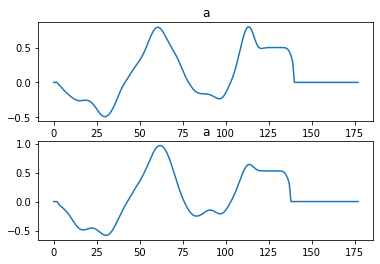

In [7]:
for i, x_speed in enumerate(x_speeds[:2]):

    plt.subplot(2, 1, i+1)
    plt.plot(np.arange(len(x_speed)), x_speed)
    plt.title(samples_label[i])

In [8]:
samples_label.shape


(2858,)

In [9]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(np.arange(len(x_speeds)), test_size=0.4, stratify=samples_label)

x_train = [x_speeds[i] for i in train_idx if samples_label[i] == 'b']
x_test = [x_speeds[i] for i in test_idx if samples_label[i] == 'b']

y_train = [y_speeds[i] for i in train_idx if samples_label[i] == 'b']
y_test = [y_speeds[i] for i in test_idx if samples_label[i] == 'b']

samples_label_train = [samples_label[i] for i in train_idx if samples_label[i] == 'b']
samples_label_test = [samples_label[i] for i in test_idx if samples_label[i] == 'b']

## TWI-kSVD on char-traj data

In [10]:
from twi_ksvd.dic_reader import LetterClassifier

clf = LetterClassifier()
clf.load_data("../results")
print(clf.letters)
clf.select_letters(['a','b','m',"h"])
x_signal = x_test[20][::2]
y_signal= y_test[20][::2]



['a', 'b', 'c', 'd', 'e', 'g', 'h', 'l', 'm', 'n', 'o', 'p']


# Test Module

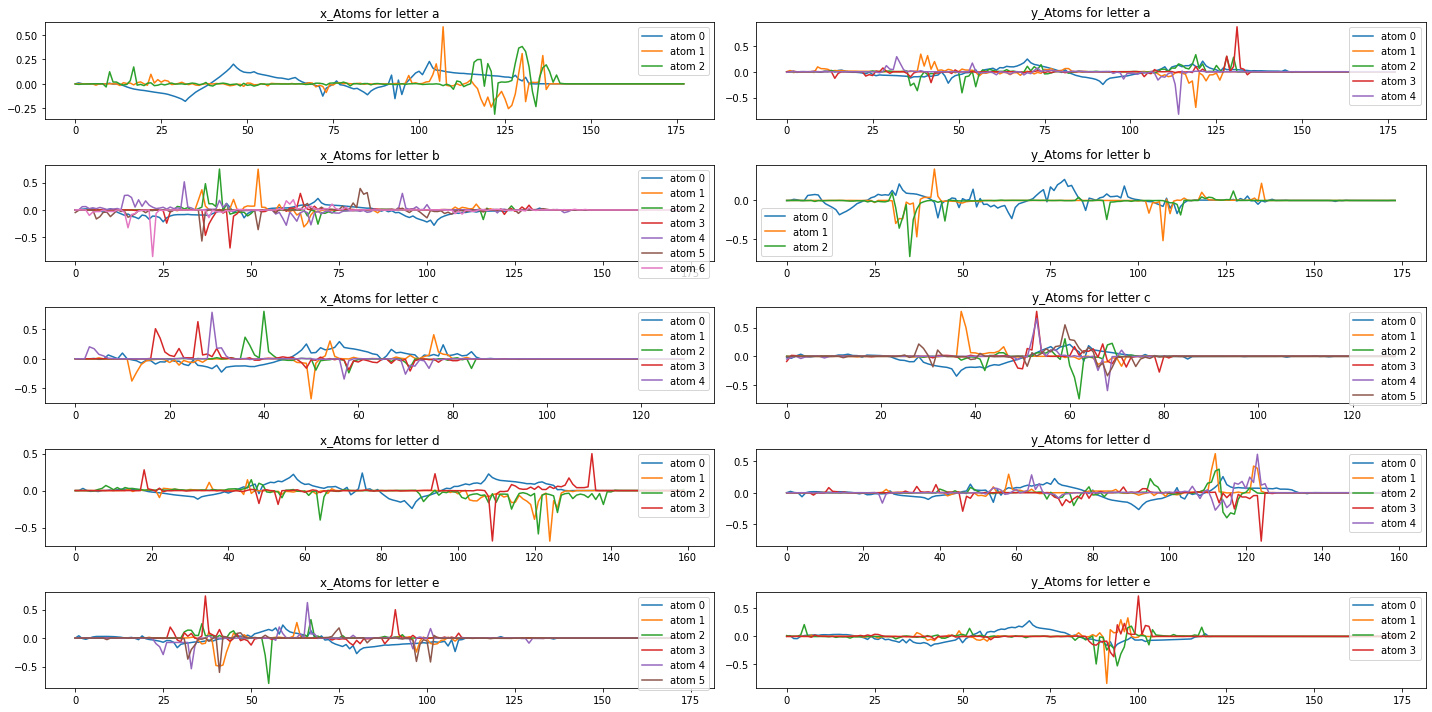

In [11]:
clf.plot_atom(clf.letters[:5])

In [12]:
alphas_x, deltas_x, alphas_y, deltas_y = clf.fit(x_signal,y_signal, tau = 2, r_window = 20)

No handles with labels found to put in legend.


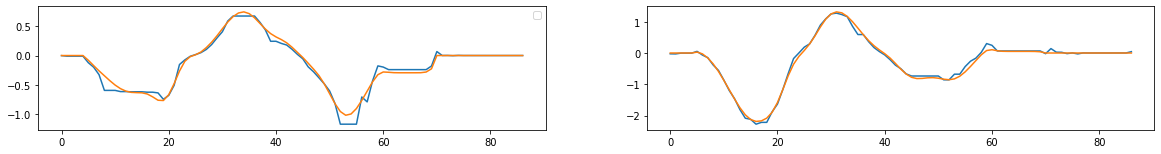

Text(0.5, 1.0, 'Reconstructed signal :')

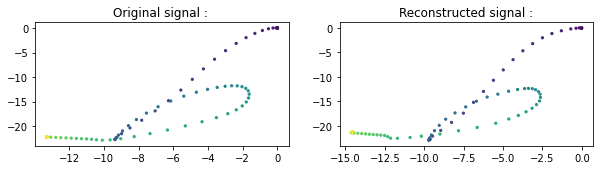

In [13]:
reconstructed_x_signal = clf.reconstruct_signal(alphas_x, deltas_x, clf.concatenated_x_dico)
reconstructed_y_signal = clf.reconstruct_signal(alphas_y, deltas_y, clf.concatenated_y_dico)

plt.figure(figsize = (20,5))
plt.subplot(223)
plt.plot(reconstructed_x_signal)
plt.plot(x_signal)
plt.legend()
plt.subplot(224)
plt.plot(reconstructed_y_signal)
plt.plot(y_signal)
plt.show()
plt.figure(figsize = (10,5))
plt.subplot(2, 2, 1)
plt.scatter(x_signal.cumsum(), y_signal.cumsum(), c=np.arange(len(x_signal)), s=5)
plt.title('Original signal : ')
# plt.axis('off')

plt.subplot(2, 2, 2)
plt.scatter(reconstructed_x_signal.cumsum(), reconstructed_y_signal.cumsum(), c=np.arange(len(reconstructed_x_signal)), s=5)
plt.title('Reconstructed signal :')
# plt.axis('off')

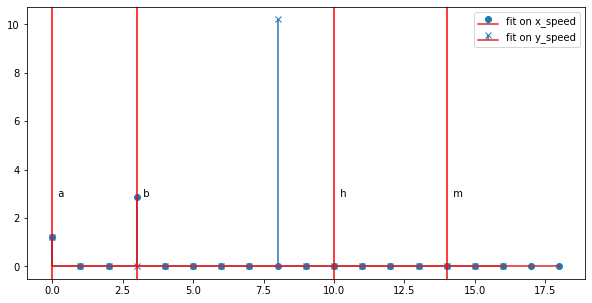

In [14]:
plt.figure(figsize = (10,5))
plt.stem(alphas_x, label = "fit on x_speed")
plt.stem(alphas_y, markerfmt = "x", label = "fit on y_speed")
curr = clf.map_letter_to_atoms_x_dico[0]
plt.axvline(0, color='r')
plt.text(0,np.max(alphas_x),'  ' + curr)
for i, st in enumerate(clf.map_letter_to_atoms_x_dico):
    if curr != st:
        plt.axvline(i, color='r')
        plt.text(i,max(alphas_x),'  ' + st)
        curr = st


plt.legend()
plt.show()

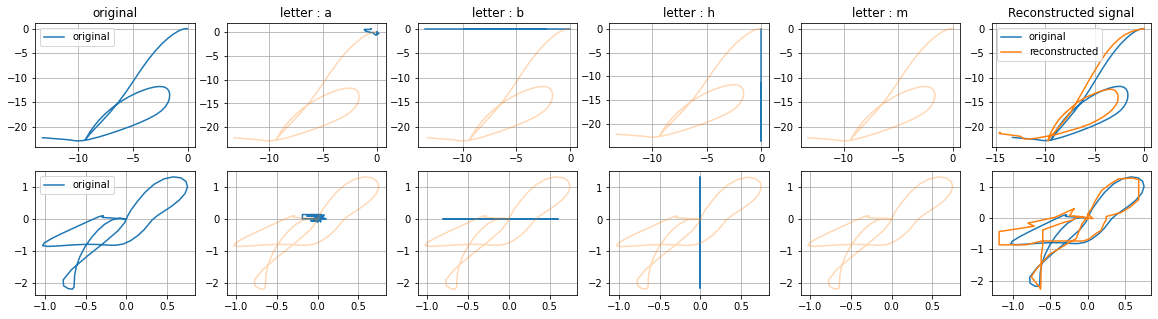

In [15]:
plt.figure(figsize = (20,5))
plt.subplot(2,len(clf.selected_letters)+2,1)
plt.plot(x_signal.cumsum(),y_signal.cumsum(),label = "original")
plt.legend()
plt.grid()
plt.title("original")
plt.subplot(2,6,7)
plt.plot(x_signal,y_signal,label = "original")
plt.legend()
plt.grid()
I = 0
J = 0 
for j,i in enumerate(clf.generator_reconstructed_signal_per_letter(alphas_x,deltas_x,alphas_y,deltas_y)): 
  plt.subplot(2,len(clf.selected_letters)+2,j+2)
  plt.plot(i[1].cumsum(),i[2].cumsum())
  plt.plot(x_signal.cumsum(),y_signal.cumsum(),label = "original", alpha = 0.3)
  plt.grid()
  plt.title("letter : " +i[0])

  plt.subplot(2,len(clf.selected_letters)+2,j+2+len(clf.selected_letters)+2)
  plt.plot(i[1],i[2])
  I += i[1]
  J+= i[2]
  plt.plot(x_signal,y_signal,label = "original", alpha = 0.3)
  plt.grid()
  # plt.plot(x_signal.cumsum(),y_signal.cumsum())
plt.subplot(2,len(clf.selected_letters)+2,j+3)
plt.plot(x_signal.cumsum(),y_signal.cumsum(),label = "original")
plt.plot(reconstructed_x_signal.cumsum(),reconstructed_y_signal.cumsum(), label = "reconstructed")
plt.grid()
plt.title("Reconstructed signal")
plt.legend()

plt.subplot(2,len(clf.selected_letters)+2,j+3+len(clf.selected_letters)+2)
plt.plot(x_signal,y_signal,label = "original")
plt.plot(reconstructed_x_signal,reconstructed_y_signal, label = "reconstructed")
plt.grid()
plt.show()

In [16]:
clf.classify(x_signal,y_signal, tau=2, r_window=20)

letter : a , res_x : 3.9998933032018895, res_y : 7.577647160206135, res_xy : 11.577540463408024
letter : b , res_x : 0.6918228661369151, res_y : 7.558610757639201, res_xy : 8.250433623776116
letter : h , res_x : 4.136886234713154, res_y : 0.6481675150735963, res_xy : 4.7850537497867505
letter : m , res_x : 4.136886234713154, res_y : 7.558610757639201, res_xy : 11.695496992352355


{'a': (3.9998933032018895,
  7.577647160206135,
  11.577540463408024,
  11.577540463408024),
 'b': (0.6918228661369151,
  7.558610757639201,
  8.250433623776116,
  8.250433623776116),
 'h': (4.136886234713154,
  0.6481675150735963,
  4.7850537497867505,
  4.7850537497867505),
 'm': (4.136886234713154,
  7.558610757639201,
  11.695496992352355,
  11.695496992352355)}

In [24]:
import pandas as pd 
from tqdm import tqdm

Lx = []
Ly = []
Lxy=[]
Lxxyy = []
for i in tqdm (range(len(x_test))):
  res = clf.classify(x_test[i][::2],y_test[i][::2], tau=2, r_window=20)
  d = pd.DataFrame(res)
  Lx.append(d.columns[d.loc[0].argmin()])
  Ly.append(d.columns[d.loc[1].argmin()])
  Lxy.append(d.columns[d.loc[2].argmin()])
  Lxxyy.append(d.columns[d.loc[3].argmin()])

  2%|▏         | 1/56 [00:14<13:03, 14.24s/it]

letter : a , res_x : 4.419075166617859, res_y : 6.890742600032978, res_xy : 11.309817766650838
letter : b , res_x : 0.7207804429740082, res_y : 7.010707486038254, res_xy : 7.731487929012262
letter : h , res_x : 4.491146179515204, res_y : 0.6936675446409708, res_xy : 5.184813724156175
letter : m , res_x : 4.491146179515204, res_y : 7.010707486038254, res_xy : 11.501853665553458


  4%|▎         | 2/56 [00:30<13:59, 15.55s/it]

letter : a , res_x : 5.547546084604912, res_y : 7.390191570651429, res_xy : 12.937737655256342
letter : b , res_x : 0.7574767254821874, res_y : 7.4602898617561815, res_xy : 8.21776658723837
letter : h , res_x : 5.547546084604912, res_y : 0.5846952189840797, res_xy : 6.132241303588992
letter : m , res_x : 5.4420753484733595, res_y : 7.4602898617561815, res_xy : 12.90236521022954


  5%|▌         | 3/56 [00:48<14:30, 16.43s/it]

letter : a , res_x : 4.302426803571692, res_y : 7.040122316321899, res_xy : 11.34254911989359
letter : b , res_x : 0.5833074623906811, res_y : 7.040122316321899, res_xy : 7.6234297787125795
letter : h , res_x : 4.302426803571692, res_y : 0.765427953193385, res_xy : 5.067854756765078
letter : m , res_x : 4.319553195261579, res_y : 6.954117422069219, res_xy : 11.273670617330797


  7%|▋         | 4/56 [01:06<14:44, 17.01s/it]

letter : a , res_x : 4.827927897614103, res_y : 7.408077589348376, res_xy : 12.23600548696248
letter : b , res_x : 0.8822401045291562, res_y : 7.408077589348376, res_xy : 8.290317693877531
letter : h , res_x : 4.827927897614103, res_y : 0.627202924206783, res_xy : 5.455130821820886
letter : m , res_x : 4.664089718073259, res_y : 7.322072985038869, res_xy : 11.986162703112129


  9%|▉         | 5/56 [01:19<13:23, 15.75s/it]

letter : a , res_x : 4.960296770709023, res_y : 8.644780698150528, res_xy : 13.605077468859552
letter : b , res_x : 1.038584827105663, res_y : 8.617485648538993, res_xy : 9.656070475644656
letter : h , res_x : 4.960296770709023, res_y : 1.0197478300769613, res_xy : 5.980044600785985
letter : m , res_x : 4.823935839713291, res_y : 8.617485648538993, res_xy : 13.441421488252285


 11%|█         | 6/56 [01:33<12:40, 15.22s/it]

letter : a , res_x : 6.579672304593852, res_y : 8.312886514172074, res_xy : 14.892558818765927
letter : b , res_x : 0.9467683660228179, res_y : 8.312886514172074, res_xy : 9.259654880194892
letter : h , res_x : 6.579672304593852, res_y : 0.8351698119581366, res_xy : 7.414842116551989
letter : m , res_x : 6.500550805517115, res_y : 8.29358501124265, res_xy : 14.794135816759765


NameError: name 'Lxx' is not defined

In [ ]:
import pandas as pd
pd.DataFrame(res).loc[1].argmin()

2